In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot
from tensorflow import constant
import tensorflow as tf

In [2]:
device_name = tf.test.gpu_device_name()
device_name

'/device:GPU:0'

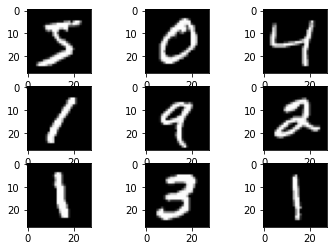

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [5]:
%%time
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 7s 11ms/step - loss: 0.3740 - accuracy: 0.8866 - val_loss: 0.0844 - val_accuracy: 0.9760
Epoch 2/15
422/422 [==============================] - 4s 10ms/step - loss: 0.1129 - accuracy: 0.9660 - val_loss: 0.0576 - val_accuracy: 0.9845
Epoch 3/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0855 - accuracy: 0.9734 - val_loss: 0.0489 - val_accuracy: 0.9867
Epoch 4/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0716 - accuracy: 0.9775 - val_loss: 0.0443 - val_accuracy: 0.9868
Epoch 5/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0657 - accuracy: 0.9794 - val_loss: 0.0379 - val_accuracy: 0.9887
Epoch 6/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0591 - accuracy: 0.9818 - val_loss: 0.0338 - val_accuracy: 0.9893
Epoch 7/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0544 - accuracy: 0.9824 - val_loss: 0.0372 - val_accuracy: 0.9883

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024277521297335625
Test accuracy: 0.9922000169754028


In [7]:
model.save("modeloKeras.h5")

In [8]:
!pip install gradio

In [9]:
import tensorflow as tf
import gradio
import gradio as gr

model = tf.keras.models.load_model("modeloKeras.h5")

def recognize_digit(image):
    image = image.reshape(1, 28, 28, 1)
    prediction = model.predict(image).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

im = gradio.inputs.Image(shape=(28, 28), image_mode='L', invert_colors=True, source="canvas")

iface = gr.Interface(
    recognize_digit, 
    im, 
    gradio.outputs.Label(num_top_classes=3),
    # live=True,
    interpretation="default",
    capture_session=True,
)

iface.test_launch()

Test launch: recognize_digit()... PASSED


In [10]:
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://31083.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://31083.gradio.app')

https://keras.io/examples/vision/mnist_convnet/